# FastText for Semantic Similarity

---
Source: https://stackabuse.com/python-for-nlp-working-with-facebook-fasttext-library/





In [1]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=0695273e8e6906ddb9d44444203fb2ba633b5ec314e584f89b54ca06b061a1b9
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [2]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

import wikipedia
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
import re
from nltk.stem import WordNetLemmatizer

In [20]:
from sklearn.decomposition import PCA

## Scraping Wikipedia Articles

In [5]:
artificial_intelligence = wikipedia.page("Artificial Intelligence").content
machine_learning = wikipedia.page("Machine Learning").content
deep_learning = wikipedia.page("Deep Learning").content
neural_network = wikipedia.page("Neural Network").content

In [6]:
artificial_intelligence = sent_tokenize(artificial_intelligence)
machine_learning = sent_tokenize(machine_learning)
deep_learning = sent_tokenize(deep_learning)
neural_network = sent_tokenize(neural_network)

In [7]:
artificial_intelligence.extend(machine_learning)
artificial_intelligence.extend(deep_learning)
artificial_intelligence.extend(neural_network)

## Data Preprocessing

In [9]:
stemmer = WordNetLemmatizer()

In [10]:
def preprocess_text(document):

  # Remove all the special characters
  document = re.sub(r'\W', ' ', str(document))

  # Remove all single characters 
  document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

  # Remove single characters from the start
  document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

  # Substituting multiple spaces with single space
  document = re.sub(r'\s+', ' ', document, flags=re.I)

  # Removing prefixed 'b'
  document = re.sub(r'^b\s+', '', document)

  # Converting to Lowercase
  document = document.lower()  

  # Lemmatixation
  tokens = document.split()
  tokens = [stemmer.lemmatize(word) for word in tokens]
  tokens = [word for word in tokens if word not in en_stop]
  tokens = [word for word in tokens if len(word) > 3]

  preprocessed_text = ' '.join(tokens)

  return preprocessed_text

Test `preprocess_text()`.

In [11]:
preprocess_text("Artificial intelligence, is the most advanced technology of the present era")

'artificial intelligence advanced technology present'

Preprocess the corpus.

In [12]:
final_corpus = [preprocess_text(sentence) for sentence in artificial_intelligence if sentence.strip() !='']

In [13]:
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

## Creating Words Representations

In [14]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [15]:
%%time
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

CPU times: user 1min 11s, sys: 398 ms, total: 1min 12s
Wall time: 42.6 s


In [16]:
print(ft_model.wv['artificial'])

[ 0.0648608  -0.20198336  0.13891436 -0.43494534  0.23629501  0.15111549
  0.36350447  0.22646692 -0.3048838   0.1965787  -0.05902217  0.22095898
 -0.17757964  0.1845231  -0.5299569   0.2783807   0.06420473  0.41921857
  0.5321626  -0.20385614 -0.07206804 -0.00452363  0.6835261  -0.28523377
 -0.1518255   0.02410667  0.01042893  0.38495412 -0.13197008 -0.15187761
 -0.35452026  0.16849008  0.20997313 -0.22011125 -0.48085442 -0.05621335
 -0.16114558 -0.51242447 -0.29789022  0.19448434  0.07852622 -0.19779868
 -0.25376788  0.37101078  0.19137031  0.17175578  0.0302557   0.03785436
  0.12177157  0.27177048  0.1175411   0.24238567  0.5810165  -0.68792206
  0.07098364 -0.22322093  0.705148    0.01532176  0.43347257 -0.1370754 ]


In [18]:
semantically_similar_words = {words: [
  item[0] for item in ft_model.wv.most_similar([words], topn=5)]
  for words in [
                'artificial', 'intelligence', 'machine', 
                'network', 'recurrent', 'deep']
  }

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

artificial:['intelligence', 'simulate', 'simulated', 'simulation', 'neuron']
intelligence:['artificial', 'simulate', 'intelligent', 'moravec', 'simulation']
machine:['learning', 'ethic', 'source', 'intelligence', 'computer']
network:['neural', 'biological', 'recurrent', 'convolutional', 'belief']
recurrent:['neural', 'network', 'feedforward', 'published', 'convolutional']
deep:['convolutional', 'specifically', 'learning', 'speech', 'generative']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [19]:
print(ft_model.wv.similarity(w1='artificial', w2='intelligence'))

0.7803097


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## Visualizing Word Similarities

In [21]:
all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['artificial', 'intelligence', 'simulate', 'simulated', 'simulation', 'neuron', 'intelligence', 'artificial', 'simulate', 'intelligent', 'moravec', 'simulation', 'machine', 'learning', 'ethic', 'source', 'intelligence', 'computer', 'network', 'neural', 'biological', 'recurrent', 'convolutional', 'belief', 'recurrent', 'neural', 'network', 'feedforward', 'published', 'convolutional', 'deep', 'convolutional', 'specifically', 'learning', 'speech', 'generative']
<class 'list'>
36


In [22]:
word_vectors = ft_model.wv[all_similar_words]

In [23]:
pca = PCA(n_components=2)

In [24]:
p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

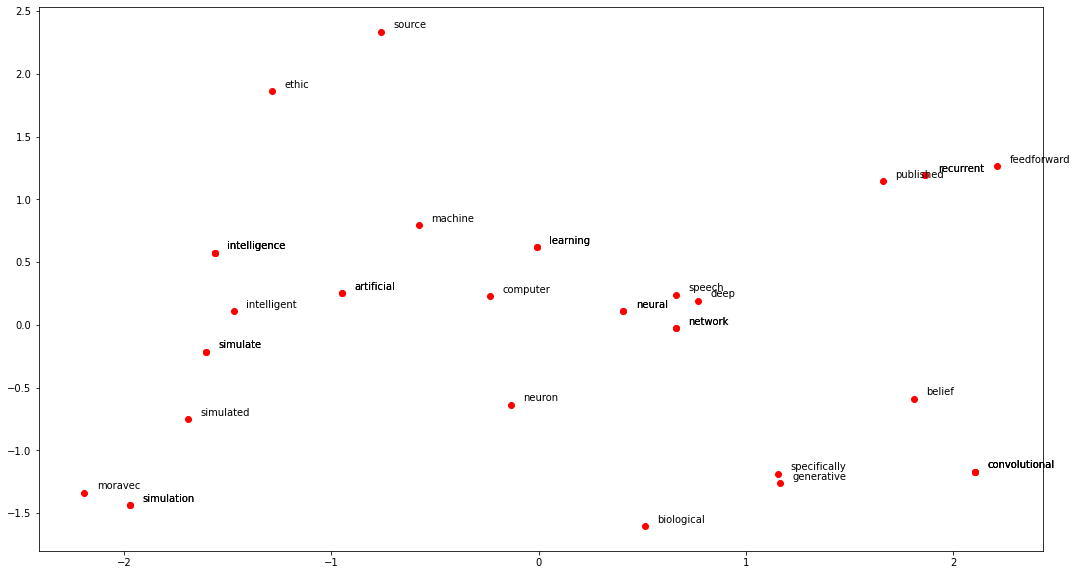

In [27]:
plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')